## IMPORTING PACKAGES AND DATA

In [59]:
# importing necessary Python libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
#import plotly.offline as pyoff
import plotly.graph_objs as go 
#import plotly.figure_factory as ff

# avoid displaying warnings
import warnings
warnings.filterwarnings("ignore")

#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from multiscorer import MultiScorer
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
import xgboost as xgb
import time

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
df = pd.read_csv('/content/drive/MyDrive/Bigdataproject/6111data (1).csv' , encoding = 'ISO-8859-1')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## DATA PREPROCESSING

In [62]:
#Renaming the columns for better readability
df.rename(columns={'Invoice':'InvoiceNo', 'Customer ID':'CustomerID', 'Price':'UnitPrice'}, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   InvoiceNo    1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   UnitPrice    1067371 non-null  float64
 6   CustomerID   824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [63]:
df.isnull().sum().sort_values(ascending = False)

CustomerID     243007
Description      4382
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [64]:
df_data = df.dropna()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   UnitPrice    824364 non-null  float64
 6   CustomerID   824364 non-null  float64
 7   Country      824364 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.6+ MB


In [65]:
df_data["CustomerID"] = df_data["CustomerID"].astype("int64")
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   UnitPrice    824364 non-null  float64
 6   CustomerID   824364 non-null  int64  
 7   Country      824364 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 56.6+ MB


In [66]:
df_data.InvoiceDate = pd.to_datetime(df_data.InvoiceDate)
df_data.head()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   UnitPrice    824364 non-null  float64       
 6   CustomerID   824364 non-null  int64         
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 56.6+ MB


In [67]:
df_data['InvoiceYearMonth'] = df_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,200912


In [68]:
df_data['Revenue'] = df_data.UnitPrice * df_data.Quantity
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,200912,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,200912,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,200912,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,200912,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,200912,30.0


In [69]:
ctm_revenue = df_data.groupby('InvoiceYearMonth').Revenue.sum().reset_index()
ctm_revenue.head()

,InvoiceYearMonth,Revenue
0,200912,663272.050
1,201001,531952.902
2,201002,489399.586
3,201003,635996.481
4,201004,560635.022


In [70]:
pd.DataFrame(ctm_revenue.Revenue.describe())

,Revenue
count,2.500000e+01
mean,6.659317e+05
std,2.154966e+05
min,3.425244e+05
25%,5.599246e+05
50%,5.872565e+05
75%,7.810333e+05
max,1.134879e+06


In [71]:
# plot line plot
line_fig = px.line(ctm_revenue, 
                   x = "InvoiceYearMonth", 
                   y = "Revenue", 
                   title = "Montly Revenue from Dec. 2009 to Dec. 2011", 
                   template= "plotly_dark" 
                  )

line_fig.update_layout(title_x=0.5, 
                       showlegend=False, 
                       xaxis={"type": "category"}, 
                       xaxis_title="Invoice Year-Month", 
                       yaxis_title="Monthly Revenue"
                      )

line_fig.show(config={'displaylogo': False})

From the above illustration, the dataset provided made the highest sales in November 2010, followed by November 2011. Also, there is a monthly sales rise after August.


In [72]:
#Percentage revenue generated by the retail shop based on the countries the customers reside.

cntry_revenue_df = df_data.groupby(['Country']).Revenue.sum().reset_index().sort_values(by=['Revenue'], 
                                                                                        ascending=False)

cntry_revenue_df['Percentage'] = np.round(cntry_revenue_df.Revenue / cntry_revenue_df.Revenue.sum() * 100, 2)

cntry_revenue_df.head(5)

,Country,Revenue,Percentage
38,United Kingdom,1.380642e+07,82.93
10,EIRE,5.785016e+05,3.47
24,Netherlands,5.485249e+05,3.29
14,Germany,4.179886e+05,2.51
13,France,3.265047e+05,1.96




from the above United Kingdom recorded the highest revenue in percentage (82.93%)



In [73]:
# Grouped the countries with revenue percentage value less than or equal to 0.25 together to plot a pie chart.

percent_margin = 0.25

# Create a new column, CountryCategory and set values to the corresponding values of the Country column
cntry_revenue_df['CountryCategory'] = cntry_revenue_df.Country

# Set Countries with Percentage less than or equal to percent_margin to 'Other Countries'

cntry_revenue_df.loc[cntry_revenue_df.Percentage <= percent_margin, 'CountryCategory'] = 'Other Countries'

cntry_revenue_df.head(11)

,Country,Revenue,Percentage,CountryCategory
38,United Kingdom,1.380642e+07,82.93,United Kingdom
10,EIRE,5.785016e+05,3.47,EIRE
24,Netherlands,5.485249e+05,3.29,Netherlands
14,Germany,4.179886e+05,2.51,Germany
13,France,3.265047e+05,1.96,France
0,Australia,1.671291e+05,1.00,Australia
34,Switzerland,9.908281e+04,0.60,Switzerland
32,Spain,9.185948e+04,0.55,Spain
33,Sweden,8.745542e+04,0.53,Sweden
9,Denmark,6.574109e+04,0.39,Denmark


In [74]:
# plot pie chart
pie_fig = px.pie(cntry_revenue_df, 
                 names="CountryCategory", 
                 values="Percentage", 
                 title="Country Revenue in Percentage", 
                 template= "plotly_dark"
                )

pie_fig.update_layout(title_x=0, 
                      legend_title="Countries Represented", 
                      legend=dict(orientation="h")
                     )

pie_fig.show(config={'displaylogo': False})

In [75]:
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,200912,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,200912,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,200912,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,200912,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,200912,30.0


# CALCULATING RECENCY

 PREDICTING CUSTOMER PURCHASE DATE (NEXT QUARTER)

A model is built below using the given dataframe df_data, to estimate if a given customer will buy something again from the online shop in the next quarter.

In [76]:
#ctm_bhvr_dt contains purchases made by customers from 01-12-2009 to 30-08-2011.
ctm_bhvr_dt = df_data[(df_data.InvoiceDate < pd.Timestamp(2011,9,1)) & 
      (df_data.InvoiceDate >= pd.Timestamp(2009,12,1))].reset_index(drop=True)

#ctm_next_quarter contains purchases made by customers in the next quarter, from 01-09-2011 to 30-11-2011.. 

ctm_next_quarter = df_data[(df_data.InvoiceDate < pd.Timestamp(2011,12,1)) & 
      (df_data.InvoiceDate >= pd.Timestamp(2011,9,1))].reset_index(drop=True)

In [77]:
# Distinct customers in the dataframe ctm_bhvr_dt
ctm_dt = pd.DataFrame(ctm_bhvr_dt['CustomerID'].unique())
ctm_dt.columns = ['CustomerID']
ctm_dt.head()

,CustomerID
0,13085
1,13078
2,15362
3,18102
4,12682


In [78]:
ctm = ctm_dt.copy()

In [79]:
# Create a dataframe with CustomerID and customers first purchase 
# first purchase date in ctm_next_quarter
ctm_1st_purchase_in_next_quarter = ctm_next_quarter.groupby('CustomerID').InvoiceDate.min().reset_index()
ctm_1st_purchase_in_next_quarter.columns = ['CustomerID','MinPurchaseDate']
ctm_1st_purchase_in_next_quarter.head()

,CustomerID,MinPurchaseDate
0,12347,2011-10-31 12:25:00
1,12348,2011-09-25 13:13:00
2,12349,2011-11-21 09:51:00
3,12352,2011-09-20 14:34:00
4,12356,2011-11-17 08:40:00


Last purchase made by each customer in the dataframe ctm_bhvr_dt.

In [80]:
ctm_last_purchase_bhvr_dt = ctm_bhvr_dt.groupby('CustomerID').InvoiceDate.max().reset_index()
ctm_last_purchase_bhvr_dt.columns = ['CustomerID','MaxPurchaseDate']
ctm_last_purchase_bhvr_dt.head()

,CustomerID,MaxPurchaseDate
0,12346,2011-01-18 10:17:00
1,12347,2011-08-02 08:48:00
2,12348,2011-04-05 10:47:00
3,12349,2010-10-28 08:23:00
4,12350,2011-02-02 16:01:00


In [81]:

ctm_purchase_dates = pd.merge(ctm_last_purchase_bhvr_dt, ctm_1st_purchase_in_next_quarter, on='CustomerID', 
                              how='left')
ctm_purchase_dates.head()

,CustomerID,MaxPurchaseDate,MinPurchaseDate
0,12346,2011-01-18 10:17:00,NaT
1,12347,2011-08-02 08:48:00,2011-10-31 12:25:00
2,12348,2011-04-05 10:47:00,2011-09-25 13:13:00
3,12349,2010-10-28 08:23:00,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00,NaT


The time difference has been calculated in days between customer's last purchase in the dataframe ctm_last_purchase_bhvr_dt and the first purchase in the dataframe ctm_1st_purchase_in_next_quarter.

In [82]:
ctm_purchase_dates['NextPurchaseDay'] = (ctm_purchase_dates['MinPurchaseDate'] - ctm_purchase_dates['MaxPurchaseDate']).dt.days

ctm_purchase_dates.head()

,CustomerID,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
0,12346,2011-01-18 10:17:00,NaT,NaN
1,12347,2011-08-02 08:48:00,2011-10-31 12:25:00,90.0
2,12348,2011-04-05 10:47:00,2011-09-25 13:13:00,173.0
3,12349,2010-10-28 08:23:00,2011-11-21 09:51:00,389.0
4,12350,2011-02-02 16:01:00,NaT,NaN


In [83]:
ctm_dt = pd.merge(ctm_dt, ctm_purchase_dates[['CustomerID','NextPurchaseDay']], on='CustomerID', how='left')
ctm_dt.head()

,CustomerID,NextPurchaseDay
0,13085,NaN
1,13078,13.0
2,15362,NaN
3,18102,27.0
4,12682,15.0


In [84]:
ctm_dt = ctm_dt.fillna(9999)
ctm_dt.head()

,CustomerID,NextPurchaseDay
0,13085,9999.0
1,13078,13.0
2,15362,9999.0
3,18102,27.0
4,12682,15.0


In [85]:
ctm_purDate = ctm_dt["NextPurchaseDay"]

We have used the Recency - Frequency - Monetary Value segmentation method. That is, we have put the customers into groups based on the following:

Recency: Customers purchase behaviour based on their most recent purchase date and how many days they have been inactive since their last purchase.

Frequency: Customers purchase behaviour based on the number of times they buy from the online retail shop.

Monetary Value/Revenue: Customers purchase behaviour based the revenue they generate.

After we have applied K-means clustering to assign customers a score to each of the features.

In [86]:
ctm_max_purchase = ctm_bhvr_dt.groupby('CustomerID').InvoiceDate.max().reset_index()
ctm_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
ctm_max_purchase.head()

,CustomerID,MaxPurchaseDate
0,12346,2011-01-18 10:17:00
1,12347,2011-08-02 08:48:00
2,12348,2011-04-05 10:47:00
3,12349,2010-10-28 08:23:00
4,12350,2011-02-02 16:01:00


In [87]:
# Find the recency in days 
ctm_max_purchase['Recency'] = (ctm_max_purchase['MaxPurchaseDate'].max() - ctm_max_purchase['MaxPurchaseDate']).dt.days

# Merge the dataframes ctm_dt and ctm_max_purchase[['CustomerID', 'Recency']] on the CustomerID column.
ctm_dt = pd.merge(ctm_dt, ctm_max_purchase[['CustomerID', 'Recency']], on='CustomerID')
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency
0,13085,9999.0,57
1,13078,13.0,0
2,15362,9999.0,348
3,18102,27.0,26
4,12682,15.0,0


In [88]:
ctm_dt = ctm_dt.drop(['NextPurchaseDay'], axis=1)

# Calculating Frequency

In [89]:
#get order counts for each user and create a dataframe with it
ctm_frequency = df_data.groupby('CustomerID').InvoiceDate.count().reset_index()
ctm_frequency.columns = ['CustomerID','Frequency']

In [90]:
#add this data to our main ctm_dt
ctm_dt = pd.merge(ctm_dt, ctm_frequency, on='CustomerID')

ctm_dt.head()

,CustomerID,Recency,Frequency
0,13085,57,92
1,13078,0,855
2,15362,348,40
3,18102,26,1068
4,12682,0,1042


# Calculating Revenue

In [91]:
ctm_revenue = df_data.groupby('CustomerID').Revenue.sum().reset_index()

In [92]:
ctm_dt = pd.merge(ctm_dt, ctm_revenue, on='CustomerID')
ctm_dt.head()

,CustomerID,Recency,Frequency,Revenue
0,13085,57,92,1459.46
1,13078,0,855,28883.83
2,15362,348,40,613.08
3,18102,26,1068,598215.22
4,12682,0,1042,23945.81


## OUTLIER TREATMENT

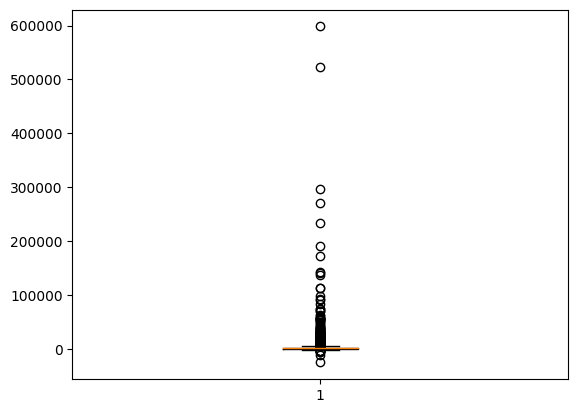

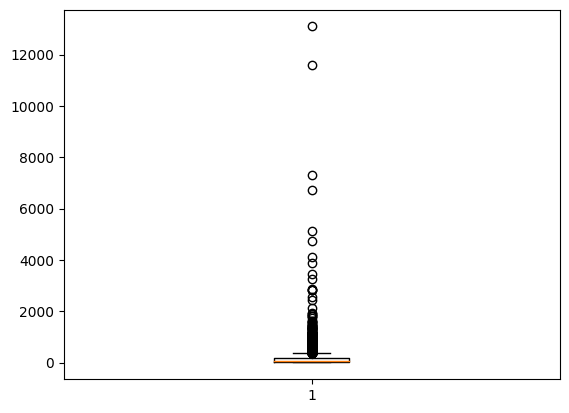

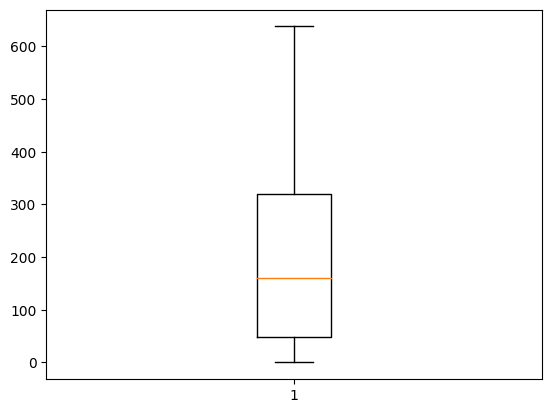

In [93]:
plt.boxplot(ctm_dt['Revenue'])
plt.show()
plt.boxplot(ctm_dt['Frequency'])
plt.show()
plt.boxplot(ctm_dt['Recency'])
plt.show()

In [94]:
q1_rev = ctm_dt['Revenue'].quantile(0.05)
q3_rev= ctm_dt['Revenue'].quantile(0.95)
IQR = q3_rev - q1_rev
ctm_dt = ctm_dt[(ctm_dt['Revenue'] >= (q1_rev - 1.5*IQR)) & (ctm_dt['Revenue'] <= q3_rev + 1.5*IQR)]
#lower_bound = q1_rev - 1.5*IQR
#if lower_bound < 0:
    #lower_bound = 0
#ctm_dt = ctm_dt[(ctm_dt['Revenue'] >= q1_rev - 1.5*IQR) & (ctm_dt['Revenue'] <= q3_rev + 1.5*IQR)(ctm_dt['Revenue'] == ctm_dt['Revenue'].min())]

#ctm_dt = ctm_dt[(ctm_dt['Revenue'] >= lower_bound) & (ctm_dt['Revenue'] <= q3_rev + 1.5*IQR)]
q1_freq = ctm_dt['Frequency'].quantile(0.05)
q3_freq = ctm_dt['Frequency'].quantile(0.95)
IQR = q3_freq - q1_freq
ctm_dt = ctm_dt[(ctm_dt['Frequency'] >= q1_freq - 1.5*IQR) & (ctm_dt['Frequency'] <= q3_freq + 1.5*IQR)]

q1_rec = ctm_dt['Recency'].quantile(0.05)
q3_rec = ctm_dt['Recency'].quantile(0.95)
IQR = q3_rec - q1_rec
ctm_dt = ctm_dt[(ctm_dt['Recency'] >= q1_rec - 1.5*IQR) & (ctm_dt['Recency'] <= q3_rec + 1.5*IQR)]


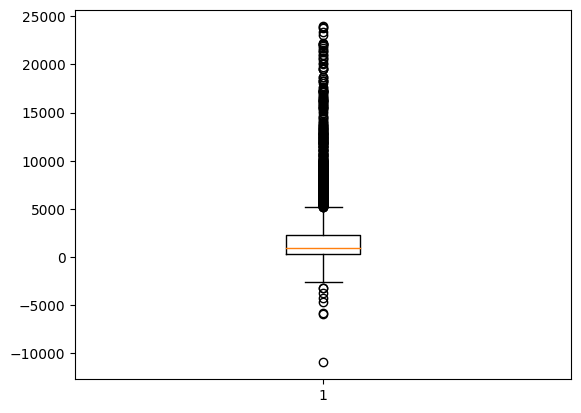

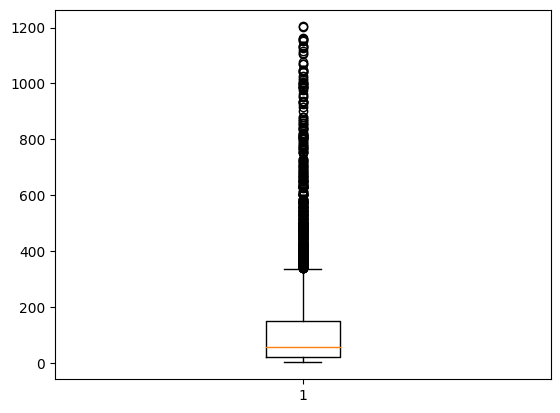

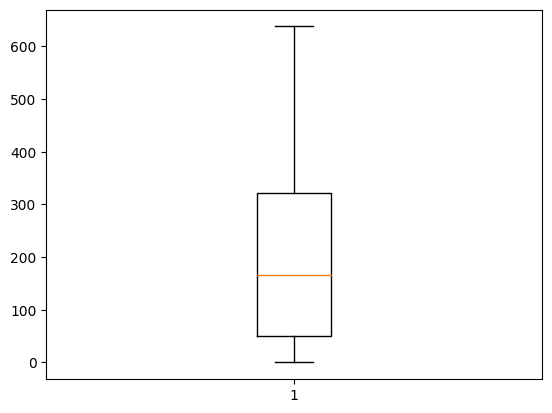

In [95]:
plt.boxplot(ctm_dt['Revenue'])
plt.show()
plt.boxplot(ctm_dt['Frequency'])
plt.show()
plt.boxplot(ctm_dt['Recency'])
plt.show()

In [96]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
cols = ['Revenue', 'Frequency', 'Recency']
ctm_dt_scaler = scale.fit_transform(ctm_dt[cols])

In [97]:
ctm_dt_scaled = pd.DataFrame(ctm_dt_scaler)
ctm_dt_scaled.columns = ['Revenue', 'Frequency', 'Recency']
ctm_dt_scaled.head()

,Revenue,Frequency,Recency
0,-0.178200,-0.178406,-0.871026
1,-0.455903,-0.484917,0.808781
2,7.199722,5.421304,-1.200061
3,4.071491,-0.160723,-0.946069
4,0.310272,0.263676,0.739511


# Hopkins Statistic

In [98]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [99]:
hopkins(ctm_dt_scaled)

0.958442916448444

# ELBOW METHOD

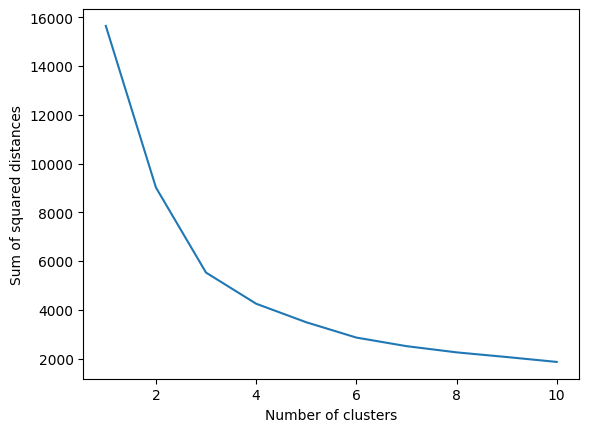

In [100]:
# Calculate the sum of squared distances for a range of k values
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(ctm_dt_scaled)
    sse[k] = kmeans.inertia_

# Plot the elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.show()

In [101]:
# Define function to identify elbow point
def find_elbow(sse):
    """
    Identify the elbow point in an SSE plot.
    
    Parameters:
        sse (dict): A dictionary containing the SSE values for a range of k values.
    
    Returns:
        int: The optimal number of clusters based on the elbow method.
    """
    x = list(sse.keys())
    y = list(sse.values())
    n_points = len(y)
    curve = np.array([x, y]).T
    vec1 = curve[-1] - curve[0]
    vec2 = curve - np.array([x[0], y[0]])
    vec_projections = np.abs(np.cross(vec1, vec2)) / np.linalg.norm(vec1)
    elbow_idx = np.argmax(vec_projections)
    return x[elbow_idx]

In [102]:
# Finding the elbow point
elbow = find_elbow(sse)
print(f"Optimal number of clusters based on elbow method: {elbow}")

Optimal number of clusters based on elbow method: 3


In [103]:
ctm_dt_medoids = ctm_dt_scaled.copy()

# K-MEANS CLUSTERING

In [104]:
number_of_clusters = 3

In [105]:
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
kmeans.fit(ctm_dt_scaled)
ctm_dt_scaled['KMeansCluster'] = kmeans.predict(ctm_dt_scaled)
ctm_dt_scaled.head()

,Revenue,Frequency,Recency,KMeansCluster
0,-0.178200,-0.178406,-0.871026,0
1,-0.455903,-0.484917,0.808781,1
2,7.199722,5.421304,-1.200061,2
3,4.071491,-0.160723,-0.946069,2
4,0.310272,0.263676,0.739511,1


In [106]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.3 MB/s eta 0:00:00


In [107]:
# from sklearn_extra.cluster import KMedoids
# kmedoids = KMedoids(n_clusters=number_of_clusters,init='k-medoids++')
# kmedoids.fit(ctm_dt_medoids)
# ctm_dt_medoids['KMedoidsCluster'] = kmedoids.predict(ctm_dt_medoids)
# ctm_dt_medoids.head()

In [108]:
centroids=kmeans.cluster_centers_
print(centroids)

[[-0.0753401  -0.07057839 -0.68008319]
 [-0.44801348 -0.4457287   1.02660029]
 [ 2.36210437  2.32694425 -0.91013542]]


In [109]:
labels = kmeans.labels_

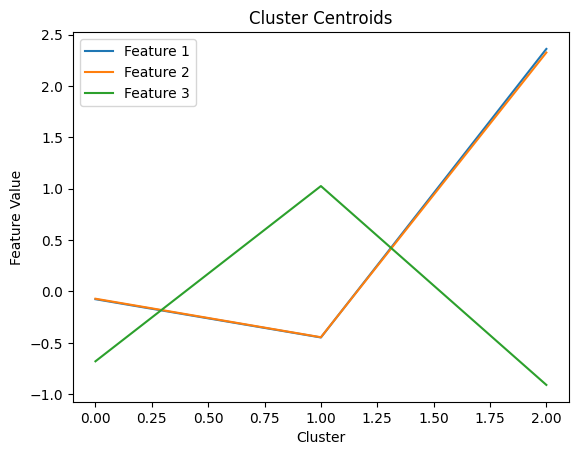

In [110]:
fig, ax = plt.subplots()
for i in range(centroids.shape[1]):
    ax.plot(centroids[:, i], label=f'Feature {i+1}')
ax.set_xlabel('Cluster')
ax.set_ylabel('Feature Value')
ax.set_title('Cluster Centroids')
ax.legend()
plt.show()

In [111]:
ctm_dt_scaled.head()

,Revenue,Frequency,Recency,KMeansCluster
0,-0.178200,-0.178406,-0.871026,0
1,-0.455903,-0.484917,0.808781,1
2,7.199722,5.421304,-1.200061,2
3,4.071491,-0.160723,-0.946069,2
4,0.310272,0.263676,0.739511,1


In [112]:
ctm_dt_scaled["CustomerID"] = ctm
ctm_dt_scaled["NextPurchaseDay"] = ctm_purDate
ctm_dt_scaled.head()

,Revenue,Frequency,Recency,KMeansCluster,CustomerID,NextPurchaseDay
0,-0.178200,-0.178406,-0.871026,0,13085,9999.0
1,-0.455903,-0.484917,0.808781,1,13078,13.0
2,7.199722,5.421304,-1.200061,2,15362,9999.0
3,4.071491,-0.160723,-0.946069,2,18102,27.0
4,0.310272,0.263676,0.739511,1,12682,15.0


<Axes: xlabel='KMeansCluster', ylabel='Revenue'>

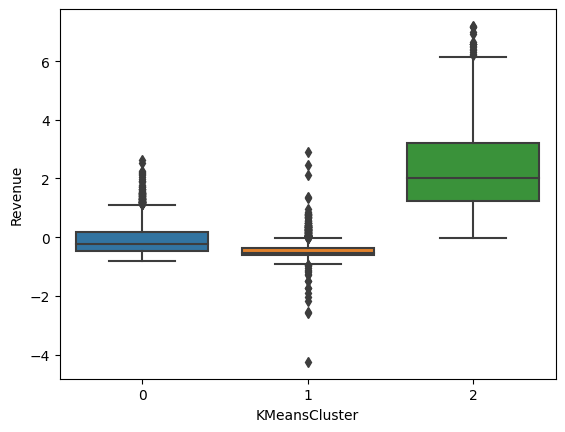

In [113]:
sns.boxplot(x='KMeansCluster', y='Revenue', data=ctm_dt_scaled)

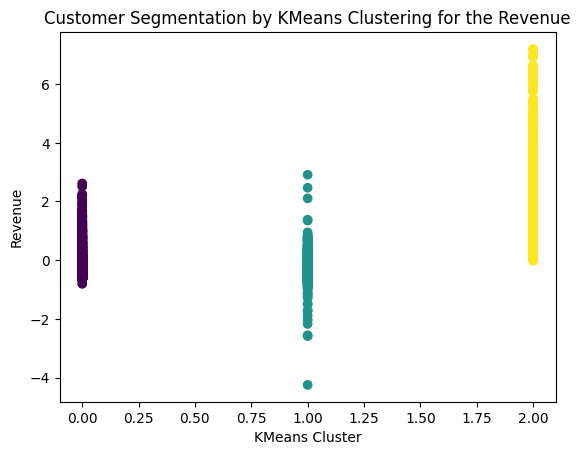

In [114]:
import matplotlib.pyplot as plt

plt.scatter(x=ctm_dt_scaled['KMeansCluster'], y=ctm_dt_scaled['Revenue'], c=kmeans.labels_)
plt.xlabel('KMeans Cluster')
plt.ylabel('Revenue')
plt.title('Customer Segmentation by KMeans Clustering for the Revenue')
plt.show()


<Axes: xlabel='KMeansCluster', ylabel='Frequency'>

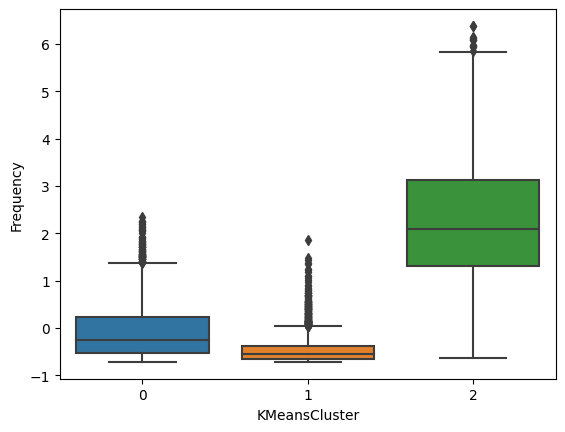

In [115]:
sns.boxplot(x='KMeansCluster', y='Frequency', data=ctm_dt_scaled)

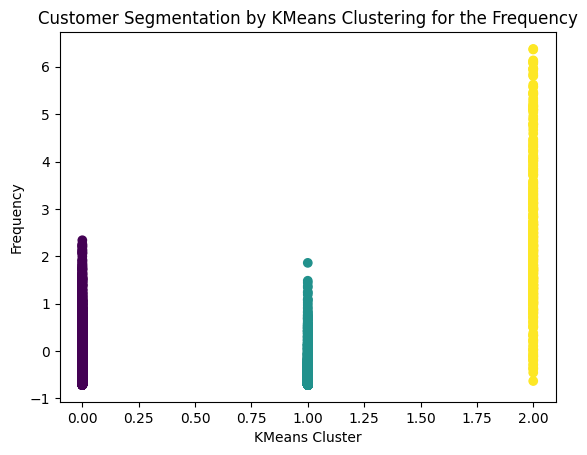

In [116]:
import matplotlib.pyplot as plt

plt.scatter(x=ctm_dt_scaled['KMeansCluster'], y=ctm_dt_scaled['Frequency'], c=kmeans.labels_)
plt.xlabel('KMeans Cluster')
plt.ylabel('Frequency')
plt.title('Customer Segmentation by KMeans Clustering for the Frequency')
plt.show()

<Axes: xlabel='KMeansCluster', ylabel='Recency'>

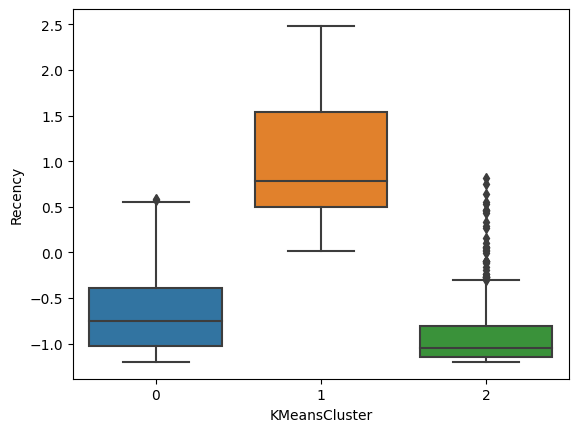

In [117]:
sns.boxplot(x='KMeansCluster', y='Recency', data=ctm_dt_scaled)

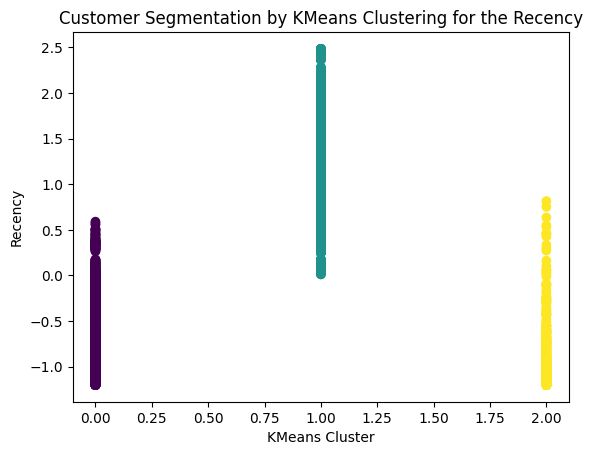

In [118]:
plt.scatter(x=ctm_dt_scaled['KMeansCluster'], y=ctm_dt_scaled['Recency'], c=kmeans.labels_)
plt.xlabel('KMeans Cluster')
plt.ylabel('Recency')
plt.title('Customer Segmentation by KMeans Clustering for the Recency')
plt.show()

# Building Machine Learning Models

In [119]:
ctm_dt_scaled.head()

,Revenue,Frequency,Recency,KMeansCluster,CustomerID,NextPurchaseDay
0,-0.178200,-0.178406,-0.871026,0,13085,9999.0
1,-0.455903,-0.484917,0.808781,1,13078,13.0
2,7.199722,5.421304,-1.200061,2,15362,9999.0
3,4.071491,-0.160723,-0.946069,2,18102,27.0
4,0.310272,0.263676,0.739511,1,12682,15.0


In [120]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data into a Pandas dataframe

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ctm_dt_scaled[['Revenue', 'Frequency', 'Recency']], ctm_dt_scaled['NextPurchaseDay'] <= 90, test_size=0.3, random_state=42)

# Scale the features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate a logistic regression model
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_y_pred = lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print('Logistic Regression Accuracy:', lr_accuracy)

# Train and evaluate a decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
dt_y_pred = dt.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print('Decision Tree Accuracy:', dt_accuracy)

# Train and evaluate a random forest model
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf_y_pred = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print('Random Forest Accuracy:', rf_accuracy)


Logistic Regression Accuracy: 0.8159744408945687
Decision Tree Accuracy: 0.6913738019169329
Random Forest Accuracy: 0.8


In [121]:
from sklearn import svm


In [122]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(ctm_dt_scaled[['Revenue', 'Frequency', 'Recency']], ctm_dt_scaled['NextPurchaseDay'] <= 90, test_size=0.2, random_state=42)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [1, 2, 3, 5]
}

# Create a Gradient Boosting Classifier object
gb_clf = GradientBoostingClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=gb_clf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           n_jobs=-1,
                           cv=3)

grid_search.fit(X_train, y_train)

# Train the model using the best hyperparameters
gb_clf_best = GradientBoostingClassifier(**grid_search.best_params_, random_state=42)
gb_clf_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_clf_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy upon using Gradient Boosting Classifier with hyperparameter tuning:', accuracy)


Accuracy upon using Gradient Boosting Classifier with hyperparameter tuning: 0.822627037392138


In [123]:
# Create a table to compare accuracy of SVM and LR models
df = pd.DataFrame({'Model': ['GradientBoostingClassifier', 'Logistic Regression','Random Forest','Decision Tree'], 'Accuracy': [accuracy, lr_accuracy,rf_accuracy,dt_accuracy]})
print(df)

                        Model  Accuracy
0  GradientBoostingClassifier  0.822627
1         Logistic Regression  0.815974
2               Random Forest  0.800000
3               Decision Tree  0.691374
